# Experiment plots and reports

In [5]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import yaml

In [11]:
results = []
for expt in os.listdir('../experiment'):
    path = os.path.join('../experiment', expt)
    with open(os.path.join(path, 'hparams.yaml')) as hpf:
        hparams = yaml.safe_load(hpf)
    metrics = pd.read_csv(os.path.join(path, 'metrics.csv'))
    metrics['run'] = expt
    metrics['model'] = hparams['model']['type']
    metrics['layers'] = hparams['model']['layers']
    metrics['nparams'] = hparams['nparams']
    results.append(metrics)
results = pd.concat(results)
results['model'] = pd.Categorical(results['model'])
results['stage'] = pd.Categorical(results['stage'])
train = results[results['stage'] == 'train']
val = results[results['stage'] == 'val']

In [46]:
def plot_by_layers(results, metric, ylabel, yscale, legendloc):
    sharey = None
    for p, model in enumerate(results['model'].cat.categories):
        ax = plt.subplot(1, 2, p+1, sharey = sharey)
        if sharey is None:
            sharey = ax
        for l, (layers, data) in enumerate(results[results['model'] == model].groupby('layers')):
            plt.plot(data['epoch'], data[metric], alpha=0.3, color='C'+str(l), label=None)
            plt.plot(data['epoch'], data[metric].ewm(alpha=0.25).mean(), color='C'+str(l), label=layers)
        plt.legend(title='Layers', loc=legendloc)
        plt.xlabel('Epoch')
        plt.ylabel(ylabel)
        plt.yscale(yscale)
        plt.title(model)
        plt.grid(which='both')
        plt.tight_layout()

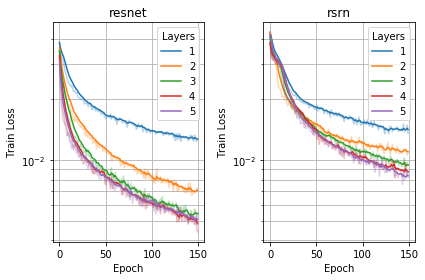

In [71]:
plot_by_layers(
    results = train,
    metric = 'loss',
    ylabel = 'Train Loss',
    yscale = 'log',
    legendloc = 'upper right')
plt.savefig('fig_train_loss.pdf', bbox_inches='tight')

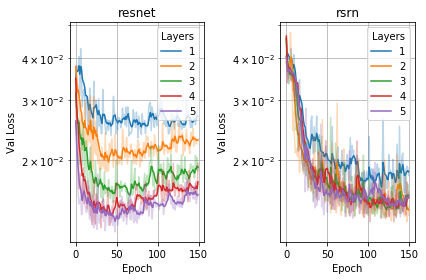

In [72]:
plot_by_layers(
    results = val,
    metric = 'loss',
    ylabel = 'Val Loss',
    yscale = 'log',
    legendloc = 'upper right')
plt.savefig('fig_val_loss.pdf', bbox_inches='tight')

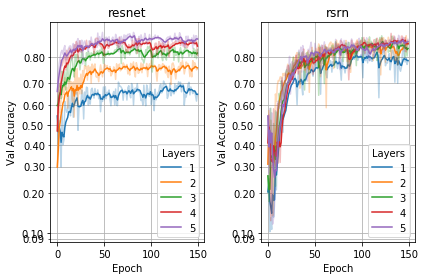

In [73]:
plot_by_layers(
    results = val,
    metric = 'accuracy',
    ylabel = 'Val Accuracy',
    yscale = 'logit',
    legendloc = 'lower right')
plt.savefig('fig_accuracy.pdf', bbox_inches='tight')

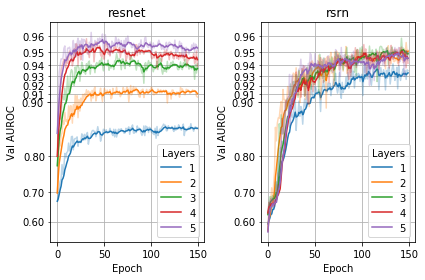

In [74]:
plot_by_layers(
    results = val,
    metric = 'auc',
    ylabel = 'Val AUROC',
    yscale = 'logit',
    legendloc = 'lower right')
plt.savefig('fig_auc.pdf', bbox_inches='tight')

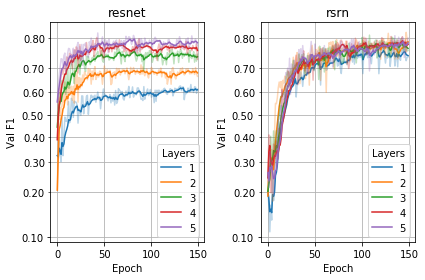

In [75]:
plot_by_layers(
    results = val,
    metric = 'f1',
    ylabel = 'Val F1',
    yscale = 'logit',
    legendloc = 'lower right')
plt.savefig('fig_f1.pdf', bbox_inches='tight')

In [64]:
def plot_final_by_model(results, metric, ylabel, yscale, legendloc):
    rfinal = results[results['epoch']==149].sort_values(by=['model','layers'])
    for model, data in rfinal.groupby('model'):
        plt.plot(data['layers'], data[metric], marker='o', label=model)
    plt.legend(title='Model', loc=legendloc)
    plt.xlabel('Layers')
    plt.xticks(range(1,6))
    plt.ylabel(ylabel)
    plt.yscale(yscale)
    plt.grid(which='both')
    plt.tight_layout()

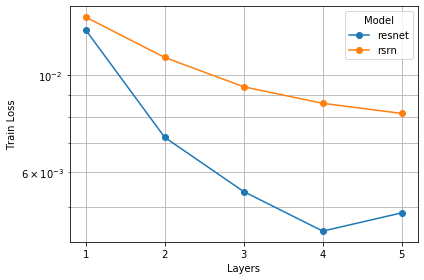

In [76]:
plot_final_by_model(
    results = train,
    metric = 'loss',
    ylabel = 'Train Loss',
    yscale = 'log',
    legendloc = 'upper right')
plt.savefig('fig_final_train_loss.pdf', bbox_inches='tight')

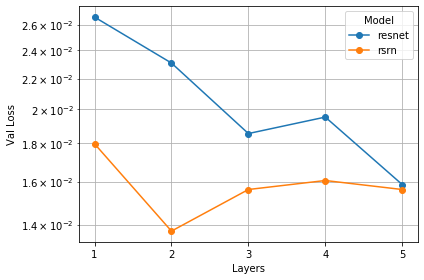

In [77]:
plot_final_by_model(
    results = val,
    metric = 'loss',
    ylabel = 'Val Loss',
    yscale = 'log',
    legendloc = 'upper right')
plt.savefig('fig_final_val_loss.pdf', bbox_inches='tight')

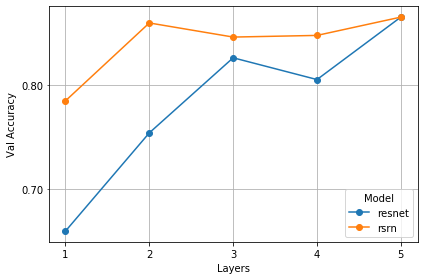

In [78]:
plot_final_by_model(
    results = val,
    metric = 'accuracy',
    ylabel = 'Val Accuracy',
    yscale = 'logit',
    legendloc = 'lower right')
plt.savefig('fig_final_accuracy.pdf', bbox_inches='tight')

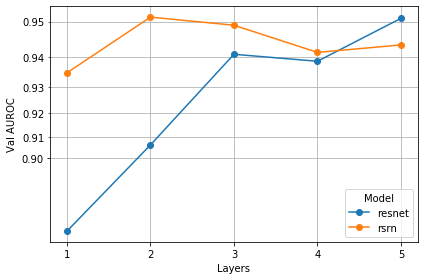

In [79]:
plot_final_by_model(
    results = val,
    metric = 'auc',
    ylabel = 'Val AUROC',
    yscale = 'logit',
    legendloc = 'lower right')
plt.savefig('fig_final_auc.pdf', bbox_inches='tight')

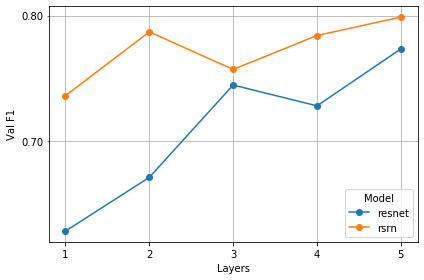

In [80]:
plot_final_by_model(
    results = val,
    metric = 'f1',
    ylabel = 'Val F1',
    yscale = 'logit',
    legendloc = 'lower right')
plt.savefig('fig_final_f1.pdf', bbox_inches='tight')